<h1>Data Visualization Python Project</h1>

<h2>Objective</h2>

   Create a Python script that analyzes a retial sales dataset, focusing on data manipulation with pandas and visulization of sales trands.

<h2>1.  Read the data</h2>

<h2>2.  Data Cleaning</h2>

*   Remove rows with the missing data

<h2>3. Data manipulation and analysis:</h2>

*   Calculate total sales per product

*   Identify the best-selling product

*   Compute average daily sales

<h2>4. Visulization</h2>

*   Plot sales trends over time

*   Display sales per product in a bar chart

<h2>5. Class and function:</h2>

*   Define a Python class `RetailSalesAnalyzer`
with methods for each of the above tasks(loading data, calculating statistics, and creating visualizations)

<h2>6.  Script execution:</h2>

*   Write a script that creates an instance of `RetailSalesAnalyzer`, calls its methods, and displays the results.






In [57]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Quick overview of the data
sales = pd.read_csv("/content/retail_sales.csv")
print(str(sales))

#Observations:
#Product A: $10
#Product B: $20
#Product C: $30
#Through 01/01 - 01/04

         Date    Product  Quantity  Sales
0  2023-01-01  Product A         5     50
1  2023-01-01  Product B         2     40
2  2023-01-02  Product A         7     70
3  2023-01-02  Product C         3     90
4  2023-01-03  Product B         4     80
5  2023-01-03  Product C         2     60
6  2023-01-04  Product A         1     10
7  2023-01-04  Product B         1     20


In [62]:
class RetailSalesAnalyzer:
  def __init__(self):
    self.data = pd.read_csv("/content/retail_sales.csv")
    self.data["Date"] = pd.to_datetime(self.data["Date"]) # Make sure that the "Date" column is converted to datetime structure

  def clean(self):
    self.data.dropna(inplace=True) #Implace True where NA

  def salesPerProduct(self):
    # Returns a table with the total of every product's sale price
    return self.data.groupby("Product")["Sales"].sum()

  def bestSeller(self):
    # Returns the name of the best selling product
    return self.salesPerProduct().sort_values(ascending=False).index[0]

  def calcDailyAverage(self):
    # Calculates the daily avaerage of sales
    return int(self.data["Sales"].mean())

  def salesTrendsLineChart(self):
    # Presents a line chart of sale progression per day
    self.data.groupby("Date")["Sales"].sum().plot(x = 'Date', y = 'Sales', kind ='line')
    plt.title("Sales per Day")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    return plt.show()

  def salesTrendsBarChart(self):
    # Presents a bar chart of daily sale
    self.salesPerProduct().plot(x = 'Product', y = 'Sales', kind ='bar')
    plt.title("Sales per Product")
    plt.xlabel('Product')
    plt.ylabel('Sales')
    return plt.show()

  def __str__(self):
    return f"{self.salesTrendsLineChart()},{self.salesTrendsBarChart()}\nTotal sales per product:\n{pd.DataFrame(self.salesPerProduct())}\n\n{self.bestSeller()} is the best selling product over this time period.\n\nThe daily average of sales accross is time period is ${self.calcDailyAverage()}."




In [63]:
analysis: RetailSalesAnalyzer = RetailSalesAnalyzer()

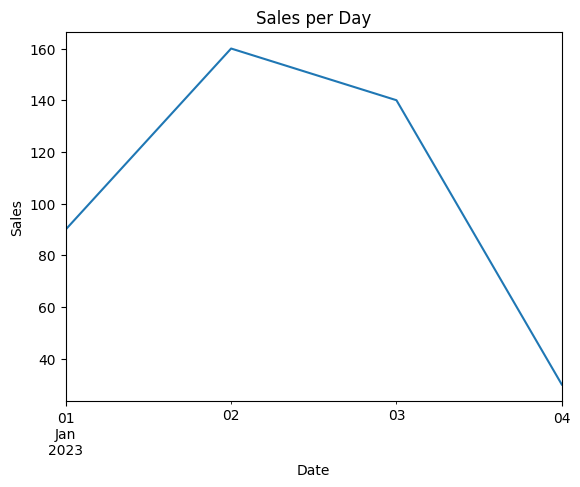

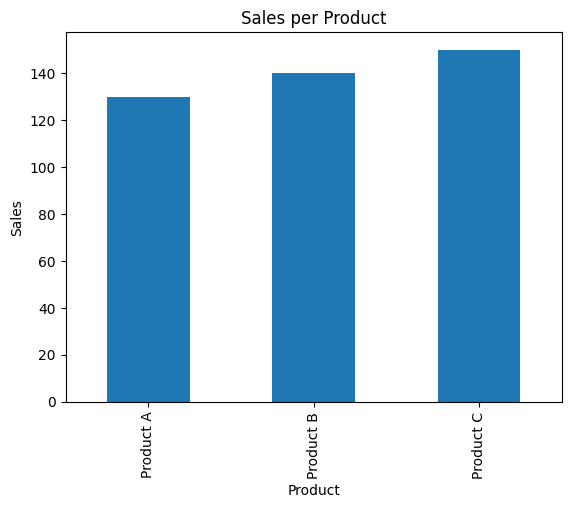

None,None
Total sales per product:
            Sales
Product         
Product A    130
Product B    140
Product C    150

Product C is the best selling product over this time period.

The daily average of sales accross is time period is $52.


In [64]:
print(analysis)